# 1. Predefined Queries

+ "What is the total revenue for [Company] in [Year]?"
+ "How has net income changed for [Company] over the last year?"
+ "What is the debt-to-asset ratio for [Company]?"
+ "What is the cash flow for [Company] in [Year]?"
+ "Show me the revenue growth trend for [Company]."

# 2. Prepare Responses

In [123]:
import pandas as pd
df = pd.read_csv("modified_company_data.csv")
df

,Company,Fiscal_Year,Total_Revenue,Net_Income,Total_Assets,Total_Liabilities,Cash_Flow,Revenue_Growth_%,Net_Income_Growth_%,Net_Profit_Margin_%,Debt_to_Asset_Ratio,Cash_Flow_to_Revenue_%
0,Apple,2022-23,394328.0,99803.0,352755.0,302083.0,122151.0,0.000000,0.000000,25.309641,0.856354,30.977004
1,Apple,2023-24,383285.0,96995.0,352583.0,306278.0,110540.0,-2.800461,-2.813543,25.306234,0.868669,28.840158
2,Apple,2024-25,391035.0,93736.0,364980.0,314529.0,115672.0,2.021994,-3.359967,23.971256,0.861771,29.580984
3,Tesla,2022-23,81462.0,12556.0,82343.0,40953.0,14724.0,0.000000,0.000000,15.413322,0.497346,18.074685
4,Tesla,2023-24,94028.0,15001.0,90231.0,42187.0,16564.0,15.425597,19.472762,15.953758,0.467544,17.616029
5,Tesla,2024-25,101276.0,17894.0,98543.0,45612.0,18203.0,7.708342,19.285381,17.668549,0.462864,17.973656
6,Microsoft,2022-23,198270.0,72738.0,364840.0,198320.0,89034.0,0.000000,0.000000,36.686337,0.543581,44.905432
7,Microsoft,2023-24,211540.0,79105.0,382125.0,204876.0,95678.0,6.692894,8.753334,37.394819,0.536149,45.229271
8,Microsoft,2024-25,225380.0,85290.0,399672.0,213429.0,102345.0,6.542498,7.818722,37.842754,0.534010,45.409974


### (a) Total Revenue Query

In [44]:
def get_total_revenue(company, year):
    result = df[(df["Company"] == company) & (df["Fiscal_Year"] == year)]
    if not result.empty:
        revenue = result["Total_Revenue"].values[0]
        return f"The total revenue for {company} in {year} was {revenue} million."
    else:
        return f"Sorry, I couldn't find revenue data for {company} in {year}."

In [46]:
get_total_revenue("Tesla", "2022-23")

'The total revenue for Tesla in 2022-23 was 81462.0 million.'

In [48]:
get_total_revenue("Youtube", "2021-22")

"Sorry, I couldn't find revenue data for Youtube in 2021-22."

### (b) Net Income Change Query

In [51]:
def get_net_income_change(company):
    result = df[df["Company"] == company]
    result = result.sort_values(by="Fiscal_Year")
    result["Net_Income_Growth_%"] = result["Net_Income"].pct_change() * 100

    last_year = result["Fiscal_Year"].iloc[-1]
    last_growth = result["Net_Income_Growth_%"].iloc[-1]

    if not pd.isna(last_growth):
        return f"Net income for {company} changed by {last_growth:.2f}% in {last_year}."
    else:
        return f"Not enough data to calculate net income change for {company}."


In [53]:
get_net_income_change("Apple")

'Net income for Apple changed by -3.36% in 2024-25.'

### (c) Debt-to-Asset Ratio Query

In [102]:
def get_debt_to_asset_ratio(company):
    result = df[df["Company"] == company]
    latest_year = result["Fiscal_Year"].iloc[-1]
    latest_ratio = (result["Total_Liabilities"] / result["Total_Assets"]).iloc[-1]

    return f"The latest debt-to-asset ratio for {company} ({latest_year}) is {latest_ratio:.2f}."

In [104]:
get_debt_to_asset_ratio("Microsoft")

'The latest debt-to-asset ratio for Microsoft (2024-25) is 0.53.'

### (d) Cash Flow Query

In [90]:
def get_cash_flow(company, year):
    result = df[(df["Company"] == company) & (df["Fiscal_Year"] == year)]
    if not result.empty:
        cash_flow = result["Cash_Flow"].values[0]
        return f"The cash flow for {company} in {year} was {cash_flow} million dollars."
    else:
        return f"Sorry, I couldn't find cash flow data for {company} in {year}."

In [92]:
get_cash_flow("Apple", "2021-22")

"Sorry, I couldn't find cash flow data for Apple in 2021-22."

In [94]:
get_cash_flow("Apple", "2022-23")

'The cash flow for Apple in 2022-23 was 122151.0 million dollars.'

### (e) Revenue Growth Trend Query

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_revenue_growth(company):
    result = df[df["Company"] == company]
    result = result.sort_values(by="Fiscal_Year")
    
    plt.figure(figsize=(8, 4))
    sns.lineplot(data=result, x="Fiscal_Year", y="Total_Revenue", marker="o", label="Revenue")
    plt.title(f"{company} Revenue Growth Over Years")
    plt.xlabel("Fiscal Year")
    plt.ylabel("Total Revenue (in million)")
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()
    
    return f"Here is the revenue growth trend for {company}."

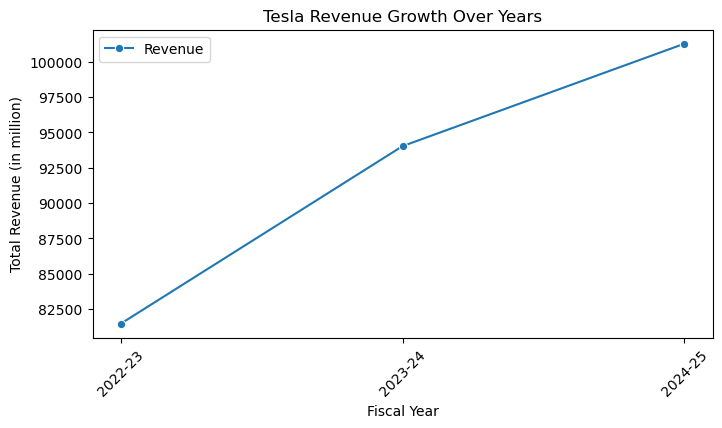

'Here is the revenue growth trend for Tesla.'

In [111]:
plot_revenue_growth("Tesla")

# Interactive Chatbot

In [114]:
# Ensure numeric columns are properly formatted
df["Total_Revenue"] = df["Total_Revenue"].astype(float)
df["Net_Income"] = df["Net_Income"].astype(float)
df["Total_Assets"] = df["Total_Assets"].astype(float)
df["Total_Liabilities"] = df["Total_Liabilities"].astype(float)
df["Cash_Flow"] = df["Cash_Flow"].astype(float)

In [181]:
def get_total_revenue(company, year):
    result = df[(df["Company"] == company) & (df["Fiscal_Year"] == year)]
    if not result.empty:
        revenue = result["Total_Revenue"].iloc[0]
        return f"The total revenue for {company} in {year} was {revenue} million."
    return f"Sorry, I couldn't find revenue data for {company} in {year}."

In [183]:
def get_net_income_change(company):
    result = df[df["Company"] == company].sort_values(by="Fiscal_Year")
    
    if len(result) < 2:
        return f"Not enough data to calculate net income change for {company}."

    result["Net_Income_Growth_%"] = result["Net_Income"].pct_change() * 100
    last_year = result["Fiscal_Year"].iloc[-1]
    last_growth = result["Net_Income_Growth_%"].iloc[-1]
    
    if pd.notna(last_growth):
        return f"Net income for {company} changed by {last_growth:.2f}% in {last_year}."
    return f"Not enough data to calculate net income change for {company}."

In [185]:
def get_debt_to_asset_ratio(company):
    result = df[df["Company"] == company]
    if result.empty:
        return f"No financial data available for {company}."
    
    latest_record = result.sort_values(by="Fiscal_Year").iloc[-1]
    latest_year = latest_record["Fiscal_Year"]
    latest_ratio = latest_record["Total_Liabilities"] / latest_record["Total_Assets"]
    
    return f"The latest debt-to-asset ratio for {company} ({latest_year}) is {latest_ratio:.2f}."

In [187]:
def get_cash_flow(company, year):
    result = df[(df["Company"] == company) & (df["Fiscal_Year"] == year)]
    if not result.empty:
        cash_flow = result["Cash_Flow"].iloc[0]
        return f"The cash flow for {company} in {year} was {cash_flow} million."
    return f"Sorry, I couldn't find cash flow data for {company} in {year}."

In [189]:
def simple_chatbot():
    print("Welcome to the Finance Chatbot! Type 'exit' to quit.\n")
    
    while True:
        user_query = input("Ask a financial question: ").strip().lower()
        
        if user_query == "exit":
            print("Goodbye!")
            break

        elif "total revenue" in user_query:
            company = input("Enter the company name: ").strip()
            year = input("Enter the fiscal year: ").strip()
            print(get_total_revenue(company, year))

        elif "net income" in user_query:
            company = input("Enter the company name: ").strip()
            print(get_net_income_change(company))

        elif "debt-to-asset ratio" in user_query:
            company = input("Enter the company name: ").strip()
            print(get_debt_to_asset_ratio(company))

        elif "cash flow" in user_query:
            company = input("Enter the company name: ").strip()
            year = input("Enter the fiscal year: ").strip()
            print(get_cash_flow(company, year))

        else:
            print("Sorry, I can only provide information on predefined queries.")

In [179]:
simple_chatbot()

Welcome to the Finance Chatbot! Type 'exit' to quit.



Ask a financial question:  What is the debt-to-asset ratio?
Enter the company name:  Tesla


The latest debt-to-asset ratio for Tesla (2024-25) is 0.46.


Ask a financial question:  What is the cash flo?


Sorry, I can only provide information on predefined queries.


Ask a financial question:  What is the cash flow?
Enter the company name:  Microsoft
Enter the fiscal year:  2023-24


The cash flow for Microsoft in 2023-24 was 95678.0 million.


Ask a financial question:  exit


Goodbye!


# Limitations

**1. Lack of Natural Language Processing (NLP)**
- The chatbot only checks for exact keyword matches (e.g., "total revenue" in user_query).
- It won’t recognize variations like:
    - "How much did Apple make in 2024-25?"
    - "Tell me about Apple’s revenue for 2024-25."
- Users must phrase questions precisely, which is not user-friendly.

**2. Requires Manual Entry for Company & Year**
- After asking a question, users must enter the company name and fiscal year separately.
- This makes interactions inefficient:
    - "What was Apple’s total revenue in 2024-25?" → Shouldn’t need extra inputs!
- It should extract the company and year from the user’s query.

**3. No Fuzzy Matching or Error Handling**
- If a user misspells a company name (e.g., "Appl" instead of "Apple"), it won’t recognize it.
- There’s no fuzzy matching to find the closest company name.

**4. Case Sensitivity Issues**
- The chatbot converts queries to lowercase (.lower()), but if get_total_revenue() does case-sensitive lookups, it might fail:
"apple" ≠ "Apple" in dataset searches.

**5. No Data Validation**
- If a user enters an invalid year (e.g., "2024/2025" or "next year"), the chatbot will likely break.
- It doesn’t check whether:
    - The company exists in the dataset.
    - The fiscal year format is correct.
    - The user provided valid inputs (e.g., no empty entries).

**6. No Context Awareness**
- If the user asks multiple questions, it forgets previous interactions:
    - Ask a financial question: What was Apple's total revenue in 2024-25?
    - Enter the company name: Apple
    - Enter the fiscal year: 2024-25
- The company and year were already in the question but still needed manual input.
- If a user follows up with "What about net income?", the chatbot doesn't remember "Apple".

**7. No Support for Multiple Queries**
- If a user asks:
    - "Tell me Apple's total revenue and net income for 2024-25."
    - The chatbot won't understand both requests.

**8. Handling for Synonyms or Variations**
- It won’t recognize that "profit" means "net income".
- If someone asks about "earnings", the chatbot won’t match it to net income.